![title](./images/intro.png)

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv
from numpy.linalg import inv

### Data for experiment


In [2]:
csvD = 'data.csv'
df = pd.read_csv(csvD)
df

,Energy(Kcal),Distance(km),Elevation Gain(km),Pace(min/km)
0,769,10.03,0.055,6.21
1,197,2.53,0.012,6.59
2,1164,15.02,0.015,6.33
3,1257,17.34,0.053,8.00
4,1322,18.04,0.029,7.36
5,1419,19.03,0.036,7.15
6,163,2.03,0.005,5.25
7,82,1.01,0.014,5.01
8,342,4.04,0.005,6.43
9,832,10.01,0.014,7.07


In [3]:
# rewrite data base(exlude from our data base header and index) 
writeD = df.to_csv('new',index = False, header = False)
data = "new"

![title](./images/goal.png)

In [4]:
# Function randomly select n-rows from our data base
def readRandRows(data,n):
    f = open(data,encoding='utf-8-sig')
    csv_f = csv.reader(f)
    csv_f = list(csv_f)
    csv_f =  [[float(y) for y in x] for x in csv_f]
    np.random.shuffle(csv_f)
    newL = []
    for row in range(n):
        newL.append(csv_f[row])
    return newL

# Assign your data
base = np.array(readRandRows(data,15))

# Select data and number of column
def column(matrix, i):
    return np.array([row[i] for row in matrix])


In [5]:
# Function to calculate sample 
# standard deviation. 
def SSD(arr):
    sm = 0
    mean = sum(arr)/len(arr)
    for i in arr:
        sm += (i - mean) **2

    return (math.sqrt(sm / (len(arr) - 1)))

# Function to calculate sample error.
def sampleError(arr):
    # Formula to find sample error.
    return SSD(arr) / (math.sqrt(len(arr)))

# Standard error of mean (SEM):
µ = sampleError(column(base,0))

def over(character):
    return "_\n"+character

![title](./images/variables.png)

### Fitting simple linear model of Energy and Distance  


Here's the plan:
* to draw the skatter plot 
* figure out, is Elevation Gain significant for our multiple linear regression
* if yes - to draw the simple linear model and to set up the parameters of the model,
 $\overline{y} = ax + b = a_1 x + a_0$ 

Draw the skatterplot of Energy vs Distance 

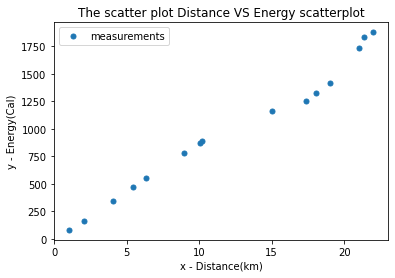

X-vector: [18.04  2.03  4.04 17.34 22.   21.35  8.96 10.04 21.   19.03  5.44  6.36
  1.01 10.22 15.02]
Y-vector: [1322.  163.  342. 1257. 1878. 1839.  781.  876. 1736. 1419.  469.  552.
   82.  891. 1164.]


In [6]:
xdata = column(base,1)
ydata = column(base,0)
plt.plot(xdata, ydata, '.', markersize=10, label='measurements')
plt.xlabel('x - Distance(km)') 
plt.ylabel('y - Energy(Cal)') 
plt.title('The scatter plot Distance VS Energy scatterplot') 
plt.legend()
plt.show()
print('X-vector:',xdata)
print('Y-vector:',ydata)

![title](./images/equation.png)

![title](./images/sum_of_square.png)

In [7]:
r = np.corrcoef(xdata, ydata)
r

array([[1.        , 0.99054508],
       [0.99054508, 1.        ]])

Compose matrices $X$ i $Y$:


In [8]:
X = np.vstack([np.ones_like(xdata), xdata])
print(X,X.shape)
Y = np.vstack([ydata])      
print(Y,Y.shape)

[[ 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
   1.    1.    1.  ]
 [18.04  2.03  4.04 17.34 22.   21.35  8.96 10.04 21.   19.03  5.44  6.36
   1.01 10.22 15.02]] (2, 15)
[[1322.  163.  342. 1257. 1878. 1839.  781.  876. 1736. 1419.  469.  552.
    82.  891. 1164.]] (1, 15)


In [9]:
a_opt = inv(X @ X.T) @ X @ Y.T
a_opt

array([[22.44786772],
       [79.36156798]])

Let's draw the summarizing graph

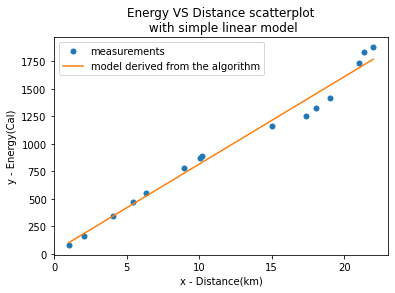

In [10]:
xx = np.linspace(xdata.min(), xdata.max(), num=100)
yy = a_opt[1]*xx + a_opt[0]

plt.plot(xdata, ydata, '.', markersize=10, label='measurements')
plt.plot(xx, yy, label='model derived from the algorithm')
plt.xlabel('x - Distance(km)') 
plt.ylabel('y - Energy(Cal)') 
plt.title('Energy VS Distance scatterplot\n with simple linear model') 
plt.legend()
plt.show()

Coefficient of correlation(r) for the the graph above:

In [11]:
r = np.corrcoef(xdata, ydata)
r

array([[1.        , 0.99054508],
       [0.99054508, 1.        ]])

Here's our simple linear regression equation $\overline{y}$ (without noise): 


In [12]:
print( over('y'),'=',a_opt[1],'x +',a_opt[0])

_
y = [79.36156798] x + [22.44786772]


### Fitting simple linear model of Energy and Elevation Gain 


Here's the plan:
* to draw the skatter plot 
* figure out, is Elevation Gain significant for our multiple linear regression
* if yes - to draw the simple linear model and to set up the parameters of the model,
 $\overline{y} = ax + b = a_1 x + a_0$ 


Draw the skatterplot of Energy vs Elevation

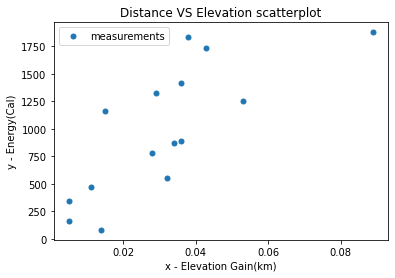

X-vector: [0.029 0.005 0.005 0.053 0.089 0.038 0.028 0.034 0.043 0.036 0.011 0.032
 0.014 0.036 0.015]
Y-vector: [1322.  163.  342. 1257. 1878. 1839.  781.  876. 1736. 1419.  469.  552.
   82.  891. 1164.]


In [13]:
xdata = column(base,2)
ydata = column(base,0)
plt.plot(xdata, ydata, '.', markersize=10, label='measurements')
plt.xlabel('x - Elevation Gain(km)') 
plt.ylabel('y - Energy(Cal)') 
plt.title('Distance VS Elevation scatterplot') 
plt.legend()
plt.show()
print('X-vector:',xdata)
print('Y-vector:',ydata)

Coefficient correlation(r) for the the graph above:

In [14]:
r = np.corrcoef(xdata, ydata)
r

array([[1.        , 0.75764878],
       [0.75764878, 1.        ]])

Compose matrices $X$ i $Y$:


In [15]:
X = np.vstack([np.ones_like(xdata), xdata])
print(X,X.shape)
Y = np.vstack([ydata])      # Do you find this line necessary whatsoever?
print(Y,Y.shape)

[[1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
  1.    1.    1.   ]
 [0.029 0.005 0.005 0.053 0.089 0.038 0.028 0.034 0.043 0.036 0.011 0.032
  0.014 0.036 0.015]] (2, 15)
[[1322.  163.  342. 1257. 1878. 1839.  781.  876. 1736. 1419.  469.  552.
    82.  891. 1164.]] (1, 15)


In [16]:
a_opt = inv(X @ X.T) @ X @ Y.T
a_opt

array([[  329.89641832],
       [20988.36266068]])

Let's draw the summarizing graph

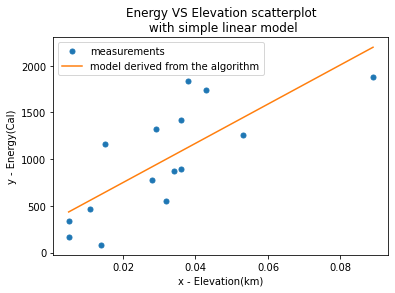

In [17]:
xx = np.linspace(xdata.min(), xdata.max(), num=100)
yy = a_opt[1]*xx + a_opt[0]

plt.plot(xdata, ydata, '.', markersize=10, label='measurements')
plt.plot(xx, yy, label='model derived from the algorithm')
plt.xlabel('x - Elevation(km)') 
plt.ylabel('y - Energy(Cal)') 
plt.title('Energy VS Elevation scatterplot\n with simple linear model') 
plt.legend()
plt.show()

Here's our simple linear regression equation $\overline{y}$ (without noise): 


In [18]:
print( over('y'),'=',a_opt[1],'x +',a_opt[0])

_
y = [20988.36266068] x + [329.89641832]


### Fitting simple linear model of Energy and Pace


Here's the plan:
* to draw the skatter plot 
* figure out, is Elevation Gain significant for our multiple linear regression
* if yes - to draw the simple linear model and to set up the parameters of the model,
 $\overline{y} = ax + b = a_1 x + a_0$ 


Draw the skatterplot of Energy vs Elevation

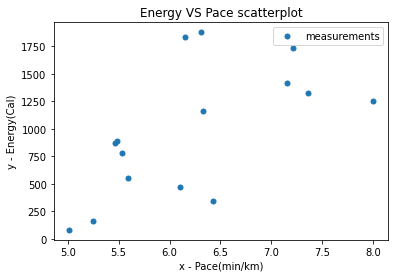

X-vector: [7.36 5.25 6.43 8.   6.31 6.15 5.53 5.46 7.21 7.15 6.1  5.59 5.01 5.48
 6.33]
Y-vector: [1322.  163.  342. 1257. 1878. 1839.  781.  876. 1736. 1419.  469.  552.
   82.  891. 1164.]


In [19]:
xdata = column(base,3)
ydata = column(base,0)
plt.plot(xdata, ydata, '.', markersize=10, label='measurements')
plt.xlabel('x - Pace(min/km)') 
plt.ylabel('y - Energy(Cal)') 
plt.title('Energy VS Pace scatterplot') 
plt.legend()
plt.show()
print('X-vector:',xdata)
print('Y-vector:',ydata)

Coefficient correlation(r) for the the graph above:

In [20]:
r = np.corrcoef(xdata, ydata)
r

array([[1.        , 0.60895539],
       [0.60895539, 1.        ]])

Coeffitient of correlation Energy to Pace is slow. 
We can say that value of Pace is not significant for our equation of multy linear regression.

### Scatterplots Summary


![title](./images/scatterplots.png)

![title](./images/check_independent.png)

### Fitting simple linear model of Distance and Elevation Gain. Multicollinearity


Here's the plan:
* to draw the skatter plot 
* to check independence between variables Distance and Elevation Gain 
* if the are dependent to each other - to draw the simple linear model and to set up the parameters of the model,
 $\overline{y} = ax + b = a_1 x + a_0$ 
* is they are not - to find a multiple linear model and to set up the parameters of the model 


Draw the skatterplot of Distance vs Elevation

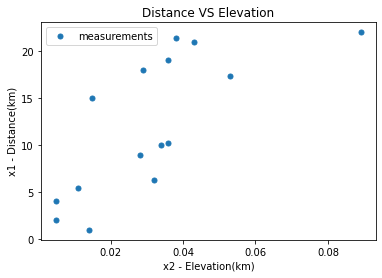

X1-vector: [18.04  2.03  4.04 17.34 22.   21.35  8.96 10.04 21.   19.03  5.44  6.36
  1.01 10.22 15.02]
X2-vector: [0.029 0.005 0.005 0.053 0.089 0.038 0.028 0.034 0.043 0.036 0.011 0.032
 0.014 0.036 0.015]


In [21]:
x2data = column(base,2)
x1data = column(base,1)
plt.plot(x2data, x1data, '.', markersize=10, label='measurements')
plt.xlabel('x2 - Elevation(km)') 
plt.ylabel('x1 - Distance(km)') 
plt.title('Distance VS Elevation') 
plt.legend()
plt.show()
print('X1-vector:',x1data)
print('X2-vector:',x2data)

Coefficient correlation(r) for the the graph above:

In [22]:
r = np.corrcoef(x1data, x2data)
r

array([[1.        , 0.73008965],
       [0.73008965, 1.        ]])

Compose matrices $X$ i $Y$:


In [23]:
X = np.vstack([np.ones_like(xdata), xdata])
print(X,X.shape)
Y = np.vstack([ydata])      # Do you find this line necessary whatsoever?
print(Y,Y.shape)

[[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.  ]
 [7.36 5.25 6.43 8.   6.31 6.15 5.53 5.46 7.21 7.15 6.1  5.59 5.01 5.48
  6.33]] (2, 15)
[[1322.  163.  342. 1257. 1878. 1839.  781.  876. 1736. 1419.  469.  552.
    82.  891. 1164.]] (1, 15)


In [24]:
a_opt = inv(X @ X.T) @ X @ Y.T
a_opt

array([[-1573.29426631],
       [  410.99415161]])

Let's draw the summarizing graph

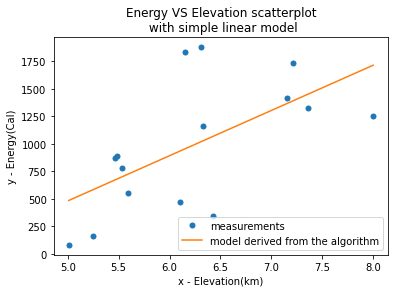

In [25]:
xx = np.linspace(xdata.min(), xdata.max(), num=100)
yy = a_opt[1]*xx + a_opt[0]

plt.plot(xdata, ydata, '.', markersize=10, label='measurements')
plt.plot(xx, yy, label='model derived from the algorithm')
plt.xlabel('x - Elevation(km)') 
plt.ylabel('y - Energy(Cal)') 
plt.title('Energy VS Elevation scatterplot\n with simple linear model') 
plt.legend()
plt.show()

### Multicollinearity 


![title](./images/correlation.png)

## Conclusion


![title](./images/conclusion.png)